In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# chengede

In [3]:
def j_E(E, n, T):
    return n**2*T**(-0.5)*np.exp(-E/T)


In [4]:
Be6_data = np.loadtxt('Be6micm.txt')
Be12_data = np.loadtxt('Be12micm.txt')
Egrid = Be6_data[:,0]
Be6trans = Be6_data[:,1] 
Be12trans = Be12_data[:,1] 

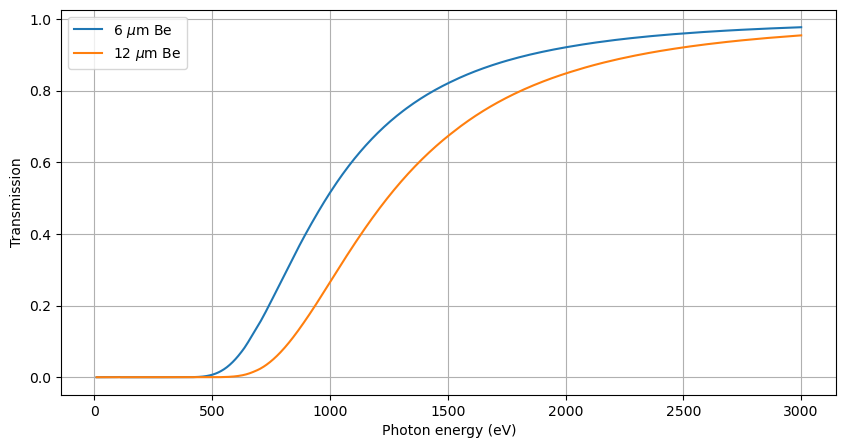

In [5]:
plt.figure(figsize=(10,5))
plt.plot(Egrid, Be6trans, label=r'6 $\mu$m Be')
plt.plot(Egrid, Be12trans, label=r'12 $\mu$m Be')
plt.grid()
plt.xlabel('Photon energy (eV)')
plt.ylabel('Transmission')
plt.legend()

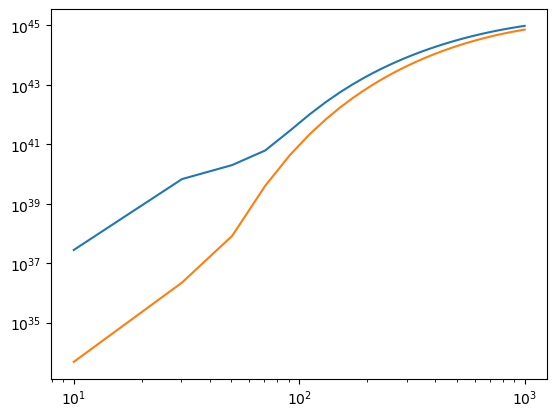

In [6]:
j1d = j_E(E=Egrid, n=1e22, T=20)
L = 1
I1d = L*j1d
n1 = 1e22

def Ni(Earray,T, Warray):

    if Earray.shape[0] != Warray.shape[0]:
        print('Error. Earray must have the same shape as Warray')

    jarray = j_E(E=Earray, n=n1, T=T)
    return np.trapz(jarray*Warray, Earray)

    

Tarray = np.linspace(10, 1000)
N6array = np.zeros_like(Tarray)
N12array = np.zeros_like(Tarray)

for i in range(Tarray.shape[0]):
    N6array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be6trans)
    N12array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be12trans)
plt.loglog(Tarray, N6array)
plt.loglog(Tarray, N12array)



    


Text(0, 0.5, 'log Ratio R = N12/N6')

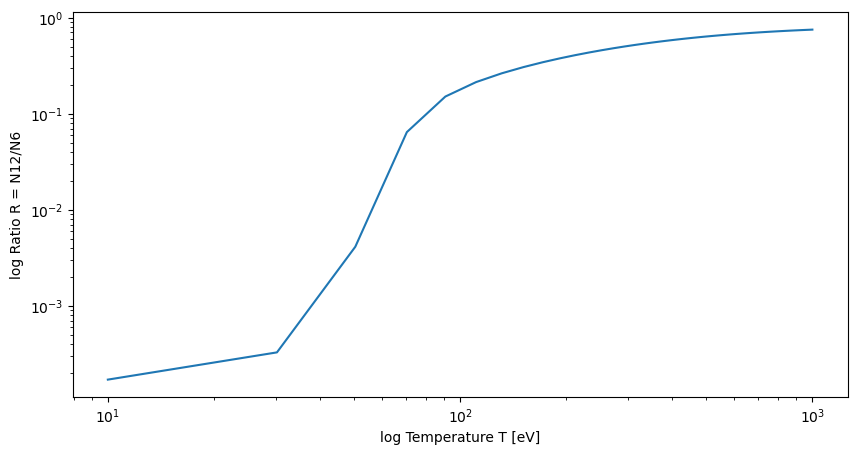

In [7]:
plt.figure(figsize=(10,5))
plt.loglog(Tarray, N12array/N6array)
plt.xlabel('log Temperature T [eV]')
plt.ylabel('log Ratio R = N12/N6')

[2.79549193e+37 1.60008183e+42 3.41030292e+43 1.22268159e+44
 2.51570925e+44 4.01108535e+44 5.55093280e+44 7.03782125e+44
 8.41999628e+44 9.67513283e+44]
[  10.  120.  230.  340.  450.  560.  670.  780.  890. 1000.]


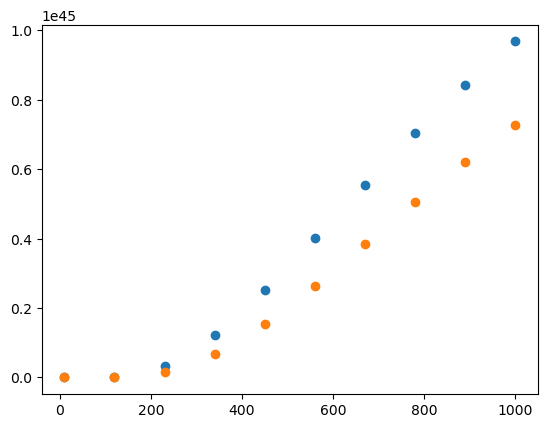

In [8]:
Tarray2 = np.linspace(10, 1000, 10)
N6array2 = np.zeros_like(Tarray2)
N12array2 = np.zeros_like(Tarray2)

for i in range(Tarray2.shape[0]):
    N6array2[i] = Ni(Earray=Egrid, T=Tarray2[i], Warray=Be6trans)
    N12array2[i] = Ni(Earray=Egrid, T=Tarray2[i], Warray=Be12trans)
print(N6array2)
print(Tarray2)
plt.scatter(Tarray2, N6array2)
plt.scatter(Tarray2, N12array2)

Text(0, 0.5, 'log Ratio R = N12/N6')

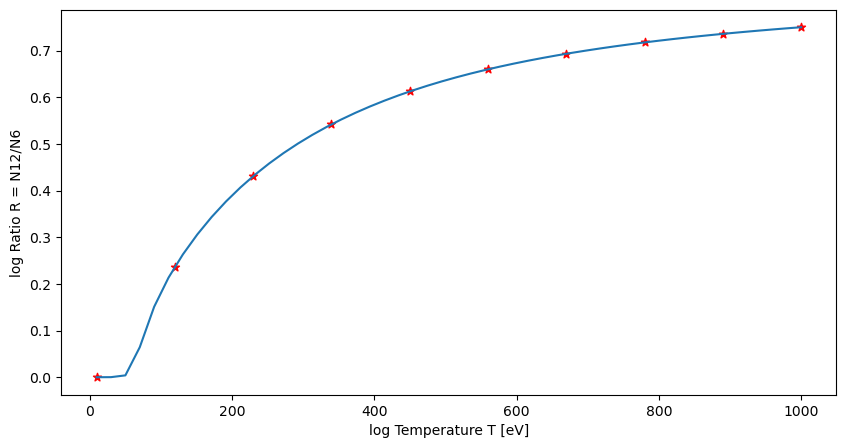

In [9]:
plt.figure(figsize=(10,5))
plt.plot(Tarray, N12array/N6array)
plt.scatter(Tarray2, N12array2/N6array2, marker='*', color='red')
plt.xlabel('log Temperature T [eV]')
plt.ylabel('log Ratio R = N12/N6')

Text(0, 0.5, 'Temperature')

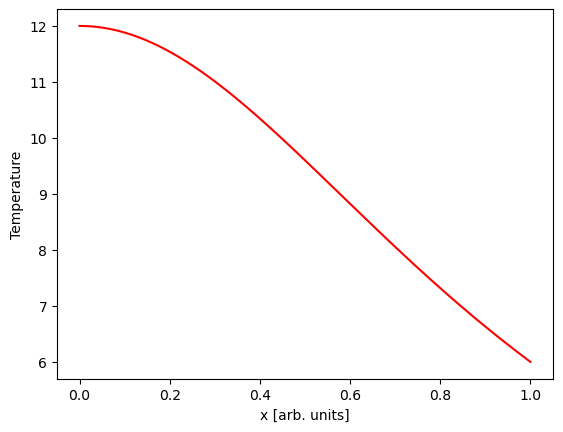

In [13]:
a = 1
n0 = 1e22
T0 = 12

def nx(x, n0):
    return n0*(1 + x**2/a**2)

def Tx(x, T0):
    return T0/(1 + x**2/a**2)

xarray = np.linspace(0, a, 1000)
narrayx = nx(xarray, n0)
Tarrayx = Tx(xarray, T0)

plt.plot(xarray, Tarrayx, color='red')
plt.xlabel('x [arb. units]')
plt.ylabel('Temperature')


Text(0, 0.5, 'Density')

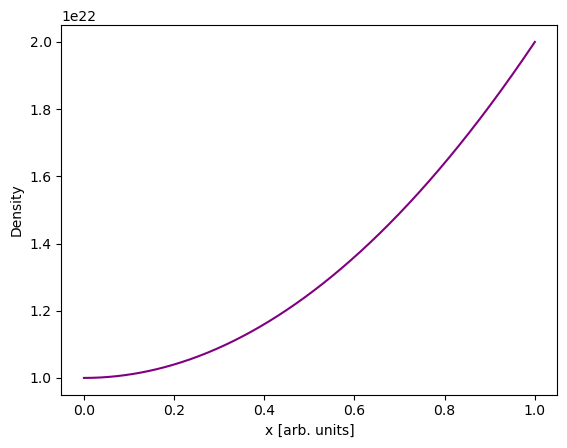

In [14]:
plt.plot(xarray, narrayx, color='purple')
plt.xlabel('x [arb. units]')
plt.ylabel('Density')

(10, 1001)


Text(0, 0.5, 'I(E) = integral(j(x, E, T0))')

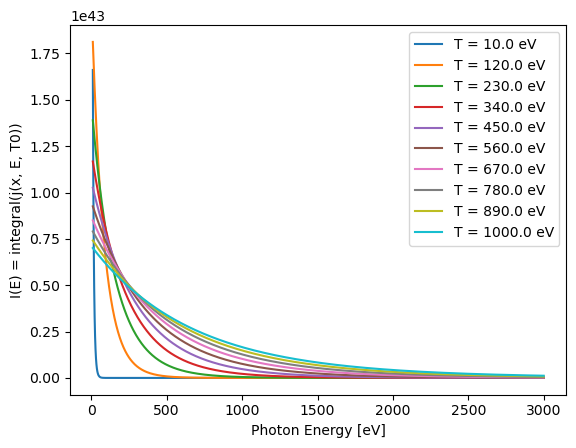

In [35]:
a = 1
n0 = 1e22
T0 = 12
def j_E(E, n, T):
    return n**2*T**(-0.5)*np.exp(-E/T)

def IE(xarray, E, T0, n0):
    jx = j_E(E, nx(xarray, n0=n0), Tx(xarray, T0=T0))
    return np.trapz(jx, xarray)



IEarray = np.zeros((Tarray2.shape[0], Egrid.shape[0]))
for i in range(Tarray2.shape[0]):
    Ti = Tarray2[i]
    for j in range(Egrid.shape[0]):
        IEarray[i, j] = IE(xarray, E=Egrid[j], T0=Ti, n0=1e22)

print(IEarray.shape)
for i in range(Tarray2.shape[0]):
    T = Tarray2[i]
    plt.plot(Egrid, IEarray[i, :], label='T = ' + str(T) + ' eV')

plt.legend()
plt.xlabel('Photon Energy [eV]')
plt.ylabel('I(E) = integral(j(x, E, T0))')

